In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_excel('../data/Tariffs.xlsx')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17520 entries, 0 to 17519
Data columns (total 2 columns):
TariffDateTime    17520 non-null datetime64[ns]
Tariff            17520 non-null object
dtypes: datetime64[ns](1), object(1)
memory usage: 273.8+ KB


In [4]:
df.head()

,TariffDateTime,Tariff
0,2013-01-01 00:00:00,Normal
1,2013-01-01 00:30:00,Normal
2,2013-01-01 01:00:00,Normal
3,2013-01-01 01:30:00,Normal
4,2013-01-01 02:00:00,Normal


In [5]:
df['Tariff'].unique()

array([u'Normal', u'Low', u'High'], dtype=object)

In [6]:
df.tail()

,TariffDateTime,Tariff
17515,2013-12-31 21:30:00,Normal
17516,2013-12-31 22:00:00,Normal
17517,2013-12-31 22:30:00,Normal
17518,2013-12-31 23:00:00,Normal
17519,2013-12-31 23:30:00,Normal


# Looks like it one year worth of data only

## From description of data: Low = 3.99p/kWh, Normal = 11.76p/kWh, and High = 67.20p/kWh

In [7]:
df.columns

Index([u'TariffDateTime', u'Tariff'], dtype='object')

In [8]:
# splittion 'TariffDateTime' into 'date' and 'time'
df['date'] = [d.date() for d in df['TariffDateTime']]
df['time'] = [d.time() for d in df['TariffDateTime']]

In [9]:
df.head()

,TariffDateTime,Tariff,date,time
0,2013-01-01 00:00:00,Normal,2013-01-01,00:00:00
1,2013-01-01 00:30:00,Normal,2013-01-01,00:30:00
2,2013-01-01 01:00:00,Normal,2013-01-01,01:00:00
3,2013-01-01 01:30:00,Normal,2013-01-01,01:30:00
4,2013-01-01 02:00:00,Normal,2013-01-01,02:00:00


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17520 entries, 0 to 17519
Data columns (total 4 columns):
TariffDateTime    17520 non-null datetime64[ns]
Tariff            17520 non-null object
date              17520 non-null object
time              17520 non-null object
dtypes: datetime64[ns](1), object(3)
memory usage: 547.6+ KB


In [11]:
df.loc[df['Tariff'] == 'Low', 'Tariff'] = 3.99
df.loc[df['Tariff'] == 'Normal', 'Tariff'] = 11.76
df.loc[df['Tariff'] == 'High', 'Tariff'] = 67.20

In [12]:
df.head()

,TariffDateTime,Tariff,date,time
0,2013-01-01 00:00:00,11.76,2013-01-01,00:00:00
1,2013-01-01 00:30:00,11.76,2013-01-01,00:30:00
2,2013-01-01 01:00:00,11.76,2013-01-01,01:00:00
3,2013-01-01 01:30:00,11.76,2013-01-01,01:30:00
4,2013-01-01 02:00:00,11.76,2013-01-01,02:00:00


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17520 entries, 0 to 17519
Data columns (total 4 columns):
TariffDateTime    17520 non-null datetime64[ns]
Tariff            17520 non-null object
date              17520 non-null object
time              17520 non-null object
dtypes: datetime64[ns](1), object(3)
memory usage: 547.6+ KB


In [14]:
def plot_one_day_tariff(date, y_column_name):
    # INPUT: str type in the format: (dd/mm/yyyy), for example -> '17/10/2012'
    # INPUT second arg: str type, name of column in DataFrame to plot on y axis
    date = pd.to_datetime(date).date()
    x = df[df['date'] == date]['time']
    y = df[df['date'] == date][y_column_name]
    #
    plt.figure(figsize=(11,11))
    plt.plot(x, y)
    plt.xlabel('time')
    plt.ylabel('{}, (p/kWh)'.format(y_column_name))
    plt.title('Date: {}'.format(date))

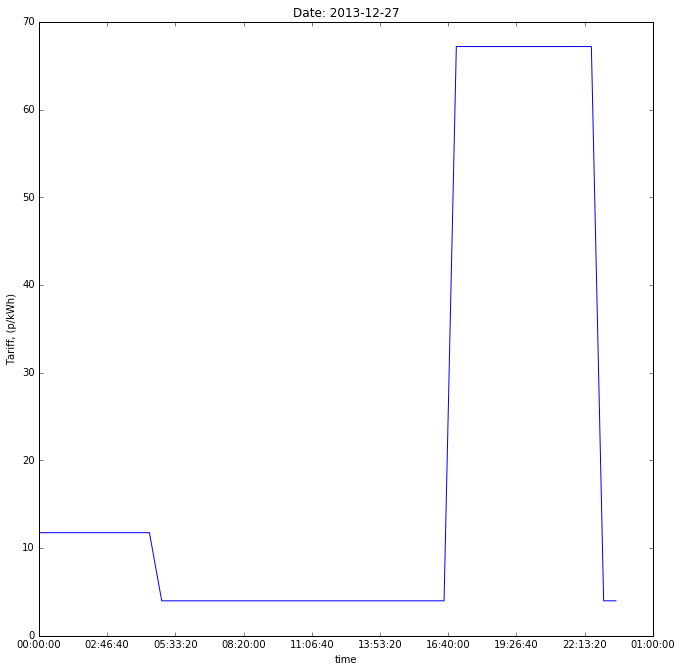

In [29]:
plot_one_day_tariff('27/12/2013', 'Tariff')

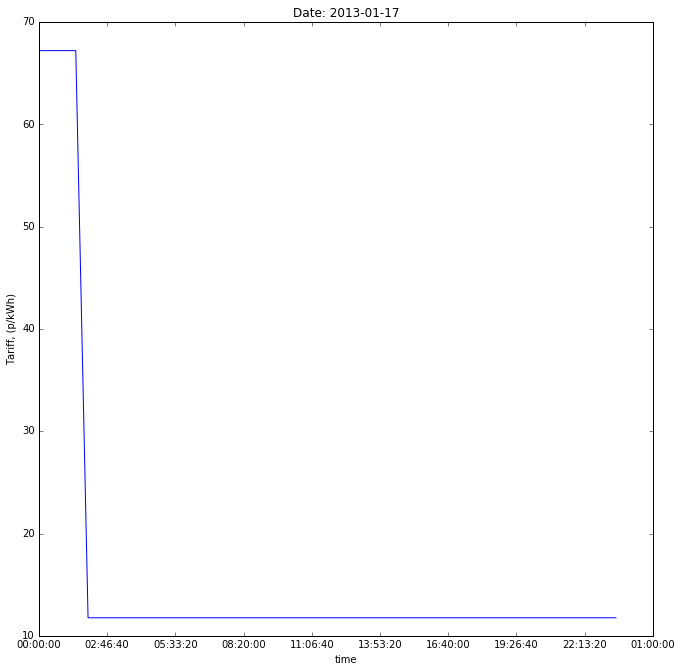

In [30]:
plot_one_day_tariff('17/01/2013', 'Tariff')